# One feature (Exam score)

In [9]:
import numpy as np

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [10]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

# testing the sigmoid function
sigmoid(0)

0.5

In [11]:
X=np.array([[1,1,1,1,1,1,1,1,1,1],
	[272,331,295,287,315,266,303,294,317,309]])
t=np.array([[0],[1],[1],[0],[1],[0],[0],[0],[1],[1]])
w=np.array([[0],[0]])

for i in range (0,10):
	T=np.matmul(w.transpose(),X)
	y=np.array([[sigmoid(T[0][0])],[sigmoid(T[0][1])],
		[sigmoid(T[0][2])],[sigmoid(T[0][3])],[sigmoid(T[0][4])],
		[sigmoid(T[0][5])],[sigmoid(T[0][6])],[sigmoid(T[0][7])],
		[sigmoid(T[0][8])],[sigmoid(T[0][9])]])

	R=np.array([[y[0][0]*(1-y[0][0]) ,0, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, y[1][0]*(1-y[1][0]), 0, 0, 0, 0, 0, 0 ,0 ,0],
	[0, 0, y[2][0]*(1-y[2][0]), 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, y[3][0]*(1-y[3][0]), 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, y[4][0]*(1-y[4][0]), 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 0, y[5][0]*(1-y[5][0]), 0, 0, 0, 0],
	[0, 0, 0, 0, 0, 0, y[6][0]*(1-y[6][0]), 0, 0, 0],
	[0, 0, 0, 0, 0, 0, 0, y[7][0]*(1-y[7][0]), 0, 0],
	[0, 0, 0, 0, 0, 0, 0, 0, y[8][0]*(1-y[8][0]), 0],
	[0, 0, 0, 0, 0, 0, 0, 0, 0, y[9][0]*(1-y[9][0])]
	])
	w1=np.matmul(np.matmul(X,R),X.transpose())
	w2=np.linalg.inv(w1)
	w3=np.matmul(X,np.subtract(y,t))
	w=np.subtract(w,np.matmul(w2,w3))	
	# print 'det', det(X*R*X.transpose())
	print(w, "\n")

def y(x):
	return sigmoid(w[0][0]+w[1][0]*x)

[[-23.28319321]
 [  0.07789626]] 

[[-38.43122697]
 [  0.12827731]] 

[[-50.83886733]
 [  0.16949876]] 

[[-56.49375121]
 [  0.18832434]] 

[[-57.28091649]
 [  0.19095149]] 

[[-57.293701  ]
 [  0.19099424]] 

[[-57.29370435]
 [  0.19099426]] 

[[-57.29370435]
 [  0.19099426]] 

[[-57.29370435]
 [  0.19099426]] 

[[-57.29370435]
 [  0.19099426]] 



In [14]:
print(y(320))
print(y(299))
print(y(150))


0.9786361045459097
0.4535290392668772
3.629301582117451e-13


## Two features (Exam 1, 2  scores)

### Loading of Data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [17]:
df=pd.read_csv("../data/ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
t=df.iloc[:,-1].values

In [7]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Built-in Classifier

In [4]:
clf = LogisticRegression(random_state=1,solver='lbfgs').fit(X, t)
clf.score(X,t)

0.89

### Plotting of Data

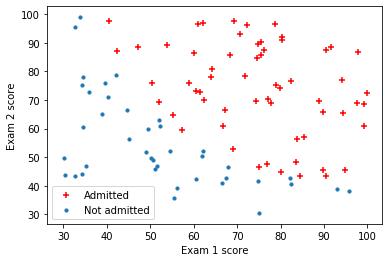

In [18]:
pos , neg = (t==1).reshape(100,1) , (t==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Applying Newton's Method

In [19]:
n=len(t)
new_col=np.ones((n,1))
X=np.append(X,new_col,1)

In [22]:
nf=2 # number of features
w=np.zeros((nf+1,1)) # initial weights
iter_num=10 

In [23]:
for i in range (0,iter_num):
    y=sigmoid(np.matmul(X,w))
    y_y=y*(1-y)

    R=np.diag(y_y.reshape(n))
    w1=np.matmul(np.matmul(X.transpose(),R),X)
    w2=np.linalg.inv(w1)
    w3=np.matmul(X.transpose(),np.subtract(y,t.reshape(n,1)))
    w=np.subtract(w,np.matmul(w2,w3))
    print(w, "\n")

[[ 0.0593635 ]
 [ 0.05576869]
 [-7.18998774]] 

[[  0.10290119]
 [  0.0973441 ]
 [-12.43910138]] 

[[  0.14857532]
 [  0.14284277]
 [-18.02668016]] 

[[  0.18678317]
 [  0.18161703]
 [-22.74581774]] 

[[  0.20388015]
 [  0.19906984]
 [-24.86866327]] 

[[  0.20619633]
 [  0.20143552]
 [-25.15692673]] 

[[  0.20623171]
 [  0.20147159]
 [-25.16133257]] 

[[  0.20623171]
 [  0.2014716 ]
 [-25.16133357]] 

[[  0.20623171]
 [  0.2014716 ]
 [-25.16133357]] 

[[  0.20623171]
 [  0.2014716 ]
 [-25.16133357]] 



In [24]:
def y(x1,x2):
	return sigmoid(w[0]*x1+w[1]*x2+w[2])

In [31]:
print(y(52,67))

[0.28116559]


### Plotting the decision boundary

Text(0, 0.5, 'Exam 2 score')

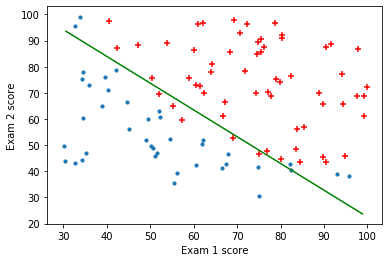

In [33]:
pos , neg = (t==1).reshape(100,1) , (t==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(w[0]*x_value+w[2])/w[1]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
#plt.legend(["Admitted","Not admitted"],loc=0)

### Predictions and Accuracy

In [44]:
y_pred=(sigmoid(X.dot(w)).round()).reshape([1,100])

In [45]:
y_pred

array([[0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 1.]])

In [37]:
t

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [49]:
print("Train Accuracy:", sum(t==y_pred[0]),"%")

Train Accuracy: 89 %


### Exercise: Write a code for Gradient Descent